In [1]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import SimultaneousActivation, RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import random
import pickle
import csv
from tqdm import tqdm, trange
from time import sleep
from collections import Counter

data_path = 'data/'


# with open((data_path + 'batch_out.pickle'), 'rb') as handle:
#     batch_out = pickle.load(handle)

 
# with open(( data_path + 'batch_keys.csv')) as f:
#     batch_keys=[tuple(line) for line in csv.reader(f)]



# Single Run Analysis

In [2]:
ports_df = pd.read_csv(data_path + 'ports.csv')
ports_df["coords"] = ports_df["coords"].apply(lambda x: eval(x)[0])
ports_df["x"] = ports_df["coords"].apply(lambda x: x[0])
ports_df["y"] = ports_df["coords"].apply(lambda x: x[1])

In [3]:
single_run_none = pd.read_csv(data_path + 'open_single_run_out.csv')
single_run_suez = pd.read_csv(data_path + 'Suez_single_run_output.csv')
single_run_hormuz = pd.read_csv(data_path + 'Hormuz_single_run_output.csv')
single_run_malacca = pd.read_csv(data_path + 'Malacca_single_run_output.csv')
single_run_panama = pd.read_csv(data_path + 'Panama_single_run_output.csv')
single_run_gibraltar = pd.read_csv(data_path + 'Gibraltar_single_run_output.csv')
single_run_dover = pd.read_csv(data_path + 'Dover_single_run_output.csv')
single_run_all = pd.read_csv(data_path + 'Total_single_run_output.csv')

last_step = single_run_suez["Step"].max()

In [4]:
# ''' Groupby Step'''
step_none = single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_suez = single_run_suez.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_hormuz = single_run_hormuz.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_malacca = single_run_malacca.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_panama = single_run_panama.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_dover = single_run_dover.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_gibraltar = single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_all = single_run_all.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]

# ''' Groupby Type'''
type_none = single_run_none[single_run_none["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_suez = single_run_suez[single_run_suez["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_hormuz = single_run_hormuz[single_run_hormuz["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_malacca = single_run_malacca[single_run_malacca["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"] 
type_panama = single_run_panama[single_run_panama["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_dover = single_run_dover[single_run_dover["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_gibraltar = single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_all = single_run_all[single_run_all["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]

<ipython-input-4-795286ef6fba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step_none = single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
<ipython-input-4-795286ef6fba>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step_suez = single_run_suez.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
<ipython-input-4-795286ef6fba>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step_hormuz = single_run_hormuz.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
<ipython-input-4-795286ef6fba>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a li

## Top Ports

In [5]:
'''Top ports'''
single_runs = [single_run_none, single_run_suez, single_run_hormuz, single_run_malacca, single_run_panama, single_run_gibraltar, single_run_dover, single_run_all]

def top_ports(single_runs,k):
    '''
    Find top k most visited ports
    '''
    positions = []
    for run in single_runs:
        positions += run["Position"].values.tolist()

    c = Counter(positions)
    top10 = c.most_common(k)

    for i in range(k):
        ref = top10[i][0]
        name = ports_df[ports_df["Unnamed: 0"]==ref]["PORT_NAME"].values.tolist()[0]
        coords = ports_df[ports_df["Unnamed: 0"]==ref]["coords"].values.tolist()[0]
        top10[i] = list(top10[i])
        top10[i].pop(0)
        top10[i].insert(0,name)
        top10[i].insert(3,coords)

    return top10


In [6]:
'''Top ports'''
top_20 = pd.DataFrame(top_ports(single_runs,20), columns = ["Name", "Freq", "coords"])
top_20

,Name,Freq,coords
0,NaN,20314,"(102.37028212945444, 1.8290091666666664)"
1,NaN,13654,"(102.42442633128908, 1.8047319109027944)"
2,NaN,7680,"(103.15488846149456, 1.4831491666666667)"
3,NaN,7648,"(104.46545358457107, 1.6849391666666667)"
4,NaN,7497,"(24.63976747009027, 37.96943267086536)"
5,NaN,7270,"(120.61321662839978, 35.970416666666665)"
6,DURBAN,6601,"(31.083391138778502, -29.858009526506066)"
7,Richards Bay,6521,"(32.119184313341975, -28.806122923269868)"
8,Izmir Liman,6449,"(26.547129509932702, 38.675322602)"
9,Çesme Liman,6385,"(26.328729844124943, 38.7419989655)"


## Global statistics

In [7]:
step_none = step_none.sum().diff(periods=1)
step_all = step_all.sum().diff(periods=1)
step_dover = step_dover.sum().diff(periods=1)
step_gibraltar = step_gibraltar.sum().diff(periods=1)
step_hormuz = step_hormuz.sum().diff(periods=1)
step_malacca = step_malacca.sum().diff(periods=1)
step_suez = step_suez.sum().diff(periods=1)
step_panama = step_panama.sum().diff(periods=1)

In [8]:
steps = [step_none,  step_all, step_dover, step_gibraltar, step_hormuz, step_malacca, step_suez, step_panama]
labels = ['None', 'Total', 'Dover', 'Gibraltar', 'Hormuz', 'Malacca', 'Suez', 'Panama']

columns = ['Route Changes',	'Destination not reachable',	'Complete',	'Success',	'Stuck']
t = np.arange(last_step)

labels_type = [ 'Dover', 'Gibraltar', 'Hormuz', 'Malacca', 'None', 'Panama', 'Suez',  'Total']
types = [type_dover.sum(), type_gibraltar.sum(), type_hormuz.sum(), type_malacca.sum(), type_none.sum(), type_panama.sum(),  type_suez.sum(), type_all.sum()]
single_runs = [single_run_none, single_run_all, single_run_dover, single_run_gibraltar, single_run_hormuz, single_run_malacca, single_run_suez, single_run_panama]

In [9]:
last = [run[run["Step"]==last_step][:] for run in single_runs]
last_steps = pd.concat(last,axis=0, keys=labels)
last_steps.head()

Step  AgentID        Type  Foresight  Position  \
None 44500    90        1   ['Large']          4      6869   
     44501    90        2  ['Normal']          2      3918   
     44502    90        3   ['Large']          2      6865   
     44503    90        4  ['Normal']          5      1342   
     44504    90        5   ['Small']          4      6859   

                                      Ports of Interest  \
None 44500               [2232, 2232, 2088, 1997, 2489]   
     44501             [3679, 1975, 47914, 4120, 18020]   
     44502               [4057, 2005, 4030, 2189, 1997]   
     44503  [2071, 3128, 47914, 2189, 2783, 4046, 3232]   
     44504        [3815, 6773, 24038, 2961, 3877, 3081]   

                                                    Itinerary  \
None 44500  [2034, 2040, 2041, 17887, 29561, 2135, 29561, ...   
     44501  [17295, 4381, 7068, 7072, 7073, 1943, 5982, 19...   
     44502  [3128, 6861, 6865, 6859, 6869, 3365, 2088, 336...   
     44503  [2001, 6919, 23786, 2132, 3128, 6861, 6865, 68...   
     44504  [6928, 6994, 15616, 6748, 17918, 6999, 2063, 2...   

            Distance_Traveled  \
None 44500            8724.18   
     44501            7207.44   
     44502            2102.62   
     44503            3544.35   
     44504           10760.23   

                                                        Route  Route Changes  \
None 44500  [25354, 25355, 1975, 6864, 6865, 6859, 6869, 2...              0   
     44501                                       [2614, 4120]              0   
     44502  [2111, 1592, 1333, 1762, 7026, 1342, 1594, 842...              0   
     44503  [6861, 3128, 6861, 6865, 6859, 6869, 6868, 621...              0   
     44504                                             [6773]              0   

            Destination not reachable  Complete  Success  Stuck  
None 44500                          0         2        2      0  
     44501                          0         1        1      0  
     44502                          0         1        1      0  
     44503                          0         1        1      0  
     44504                          0         1        1      0

Text(0.5, 1.0, 'Distance travelled under different blockages (total)')

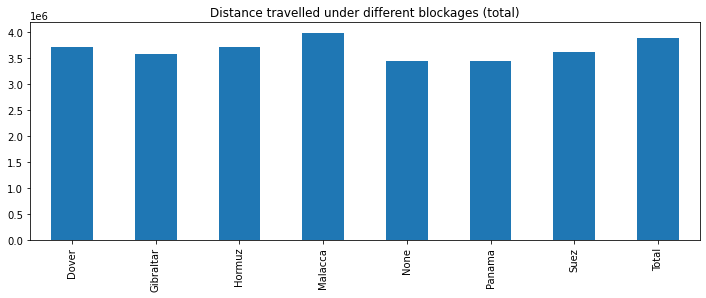

In [10]:
total_distances = last_steps.groupby(level = 0)["Distance_Traveled"].sum()
total_distances.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (total)")



Text(0.5, 1.0, "Distance travelled under different blockages (centered on 'Open')")

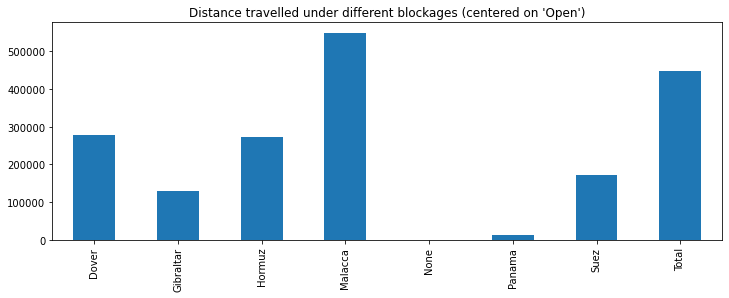

In [11]:
centered = (total_distances - total_distances["None"])
centered.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (centered on 'Open')")


Text(0.5, 1.0, "Distance travelled under different blockages (centered on 'Open')")

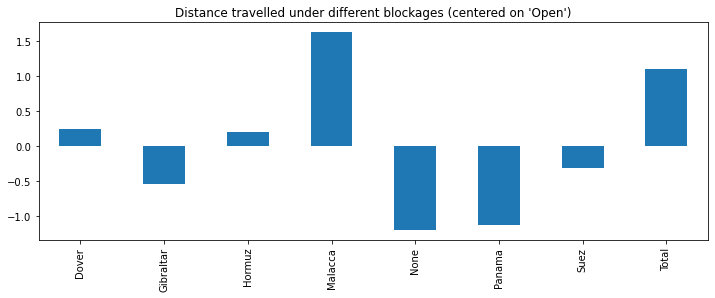

In [12]:
re_centered = (centered - centered.mean() )/ centered.std()
re_centered.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (centered on 'Open')")

Dover         7
Gibraltar     8
Hormuz        0
Malacca       6
None          0
Panama       13
Suez          3
Total        31
Name: Stuck, dtype: int64


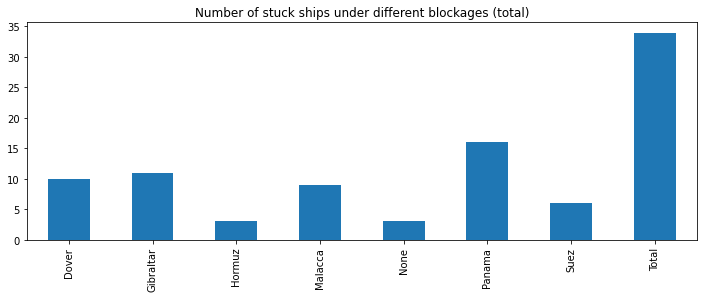

In [13]:
total_stucks = last_steps.groupby(level = 0)["Stuck"].sum()
total_stucks.plot(kind = "bar", figsize = (12,4))
plt.title("Number of stuck ships under different blockages (total)")
print((total_stucks - total_stucks["None"]))

Dover         341
Gibraltar     409
Hormuz        -78
Malacca      1476
None            0
Panama        -36
Suez         -105
Total        1842
Name: Route Changes, dtype: int64


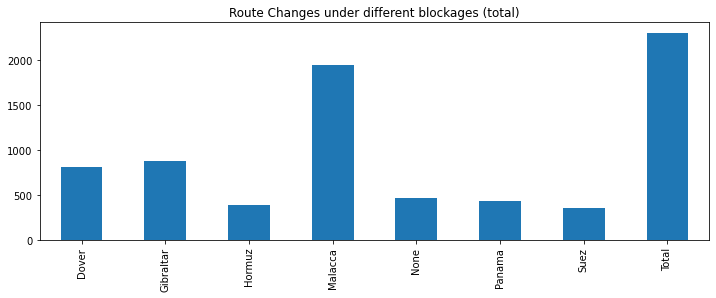

In [14]:
total_route_cng = last_steps.groupby(level = 0)["Route Changes"].sum()
total_route_cng.plot(kind = "bar", figsize = (12,4))
plt.title("Route Changes under different blockages (total)")
print((total_route_cng - total_route_cng["None"]))

Dover         96
Gibraltar     51
Hormuz        78
Malacca      162
None           0
Panama       223
Suez          13
Total        302
Name: Destination not reachable, dtype: int64


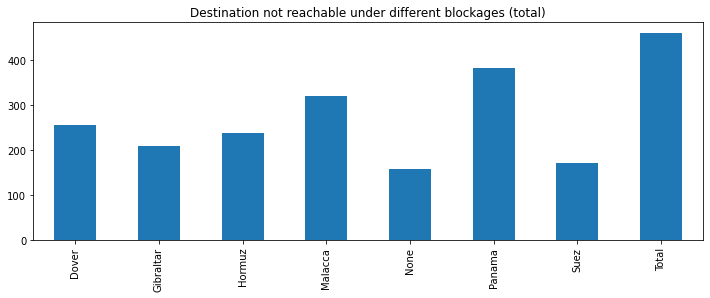

In [15]:
total_dest_not_reached = last_steps.groupby(level = 0)["Destination not reachable"].sum()
total_dest_not_reached.plot(kind = "bar", figsize = (12,4))
plt.title("Destination not reachable under different blockages (total)")
print((total_dest_not_reached - total_dest_not_reached["None"]))

Dover       -14
Gibraltar   -57
Hormuz      -52
Malacca     -62
None          0
Panama      -41
Suez        -53
Total       -70
Name: Complete, dtype: int64


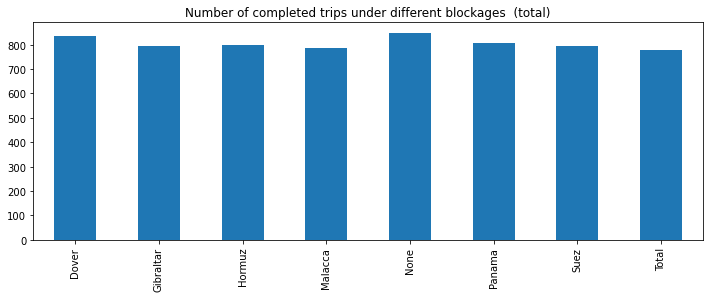

In [16]:
total_complete = last_steps.groupby(level = 0)["Complete"].sum()
total_complete.plot(kind = "bar", figsize = (12,4))
plt.title("Number of completed trips under different blockages  (total)")
print((total_complete - total_complete["None"]))

## Step analysis

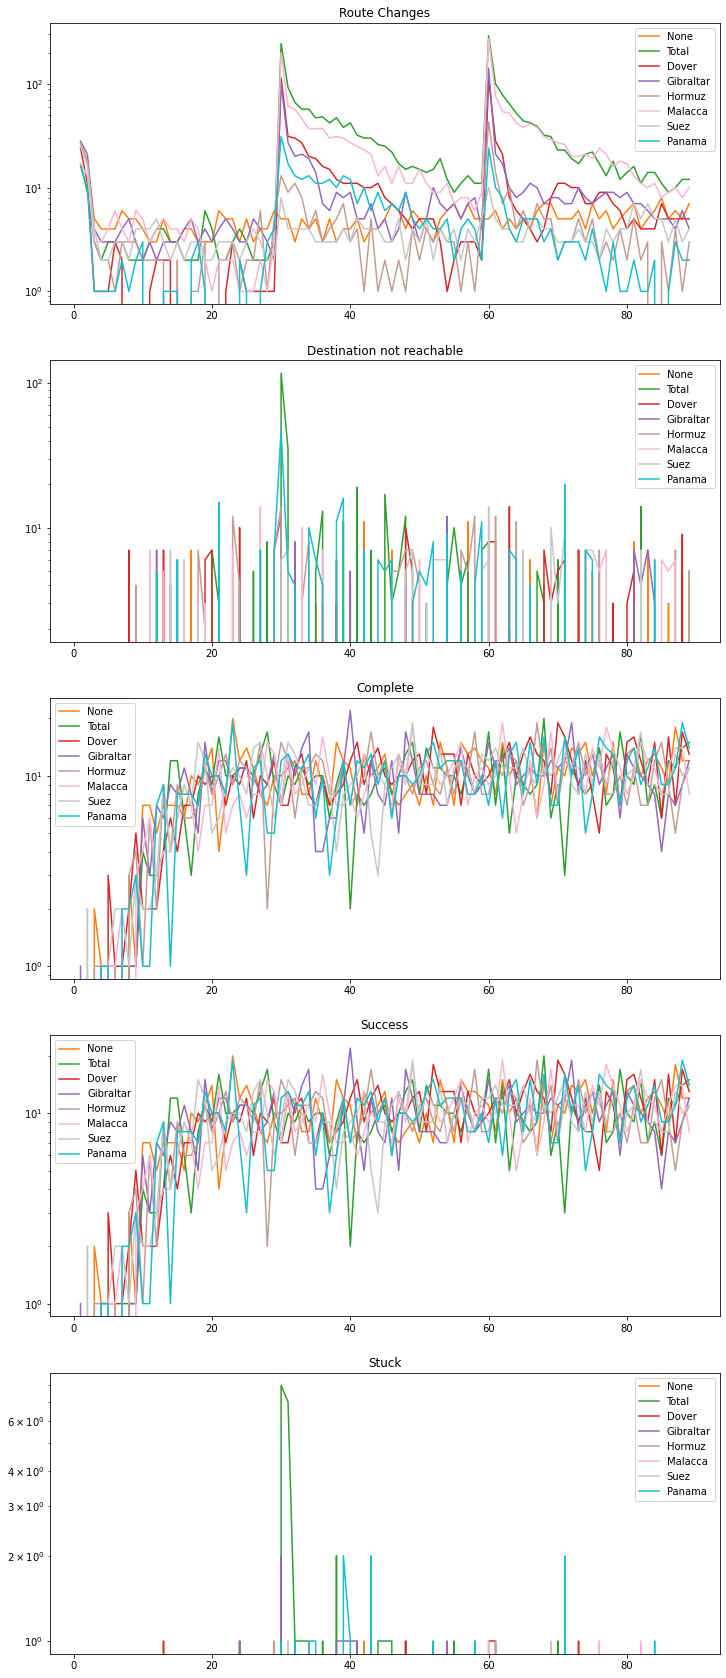

In [17]:
'''
Plots WITH LOGS
'''

k = len(columns)
fig, ax = plt.subplots(k, facecolor='w', figsize=(12,30), squeeze=False)

color = plt.cm.tab20(np.linspace(0.1,0.9,len(steps)))
ax = ax.T.flatten()

for i in range(k):
    for j,c in zip(range(len(steps)),color):
        ax[i].plot(t, steps[j][:len(t)][[columns[i]]], c=c, label = labels[j])    
        ax[i].legend(fancybox = True)
    ax[i].set_title(columns[i])
    ax[i].set_yscale('log')
    



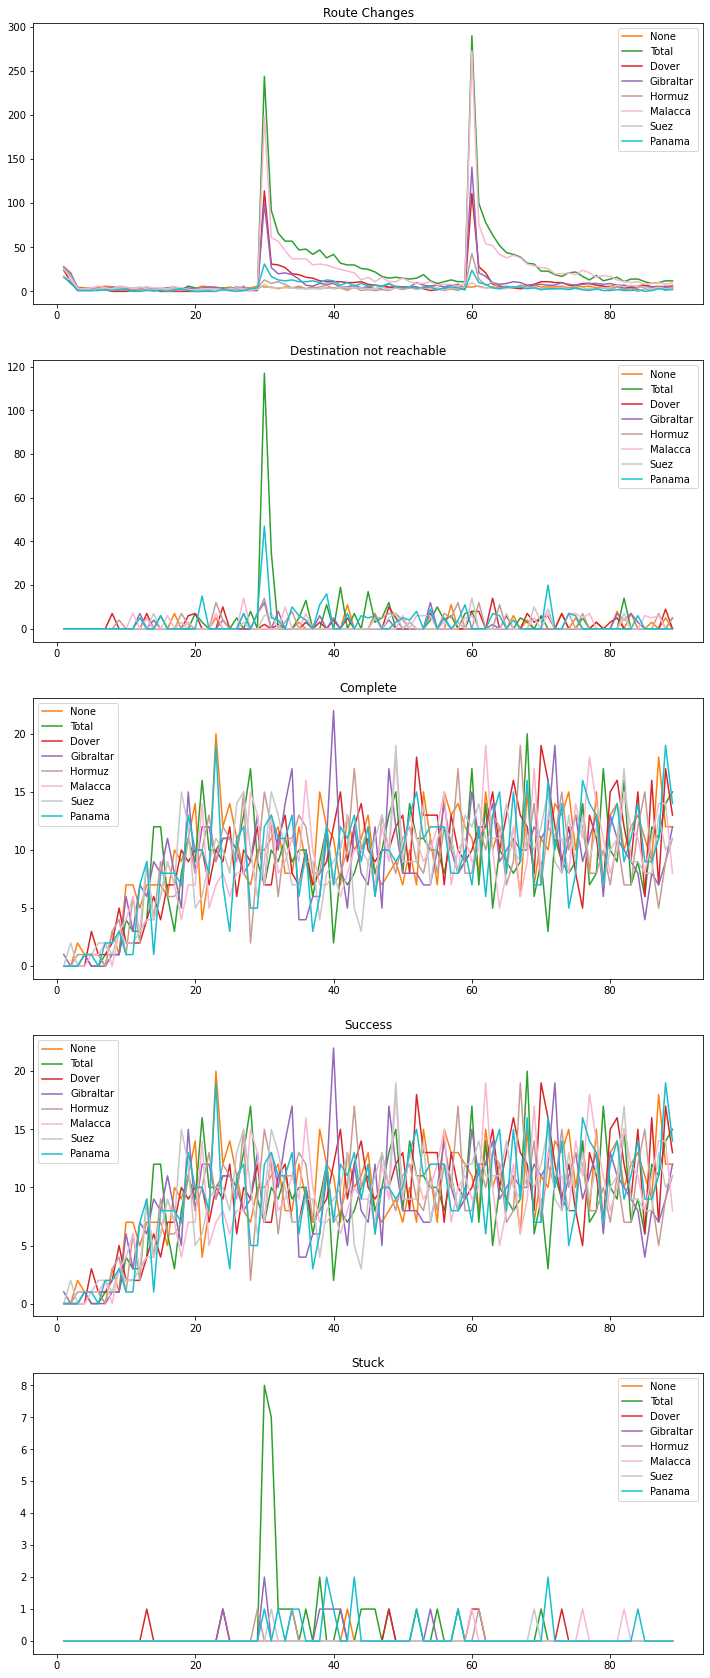

In [18]:
'''
Plots WITHOUT LOG
'''
k = len(columns)
fig, ax = plt.subplots(k, facecolor='w', figsize=(12,30), squeeze=False)

color = plt.cm.tab20(np.linspace(0.1,0.9,len(steps)))
ax = ax.T.flatten()

for i in range(k):
    for j,c in zip(range(len(steps)),color):
        ax[i].plot(t, steps[j][:len(t)][[columns[i]]], c=c, label = labels[j])    
        ax[i].legend(fancybox = True)
    ax[i].set_title(columns[i])
    #ax[i].set_yscale('log')
    



# Type Analysis

In [19]:
labels_type_norm = [ 'Dover', 'Gibraltar', 'Hormuz', 'Malacca','Panama', 'Suez',  'Total']
types_norm = [type_dover.sum()-type_none.sum(), type_gibraltar.sum()-type_none.sum(), type_hormuz.sum()-type_none.sum(), type_malacca.sum()-type_none.sum(),  type_panama.sum()-type_none.sum(),  type_suez.sum()-type_none.sum(), type_all.sum()-type_none.sum()]
types_df = pd.concat(types_norm,axis=1, keys=labels_type_norm).T

In [20]:
types_df.columns = ['Large', 'Normal', 'Small']

(array([0, 1, 2]),
 [Text(0, 0, 'Large'), Text(1, 0, 'Normal'), Text(2, 0, 'Small')])

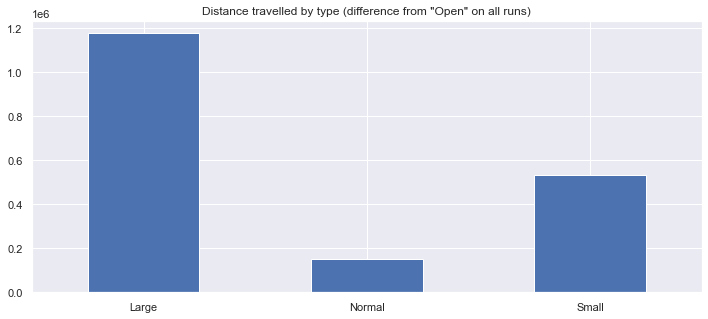

In [21]:
import seaborn as sns
sns.set_theme(color_codes=True)
types_df.groupby(level = 1).sum().loc['Distance_Traveled'].plot(kind = "bar", figsize = (12,5), title = 'Distance travelled by type (difference from "Open" on all runs)')
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Complete'),
  Text(1, 0, 'Route Changes'),
  Text(2, 0, 'Destination not reachable'),
  Text(3, 0, 'Success'),
  Text(4, 0, 'Stuck')])

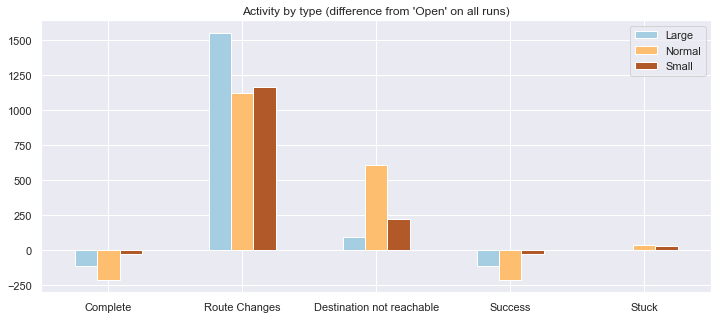

In [22]:
types_df.groupby(level = 1).sum().loc[['Complete', 'Route Changes', 'Destination not reachable', 'Success', 'Stuck']].plot(kind = "bar", figsize = (12,5),  colormap = 'Paired')
plt.title("Activity by type (difference from 'Open' on all runs)")
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'Complete'), Text(1, 0, 'Route Changes')])

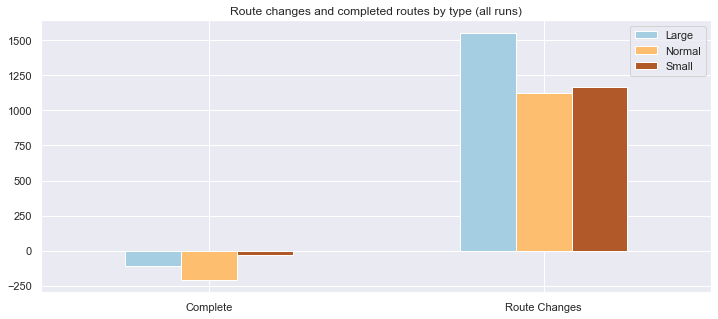

In [23]:
types_df.groupby(level = 1).sum().loc[['Complete', 'Route Changes']].plot(kind = "bar", figsize = (12,5),  colormap = 'Paired')
plt.title("Route changes and completed routes by type (all runs)")
plt.xticks(rotation = 0)

(array([0]), [Text(0, 0, 'Destination not reachable')])

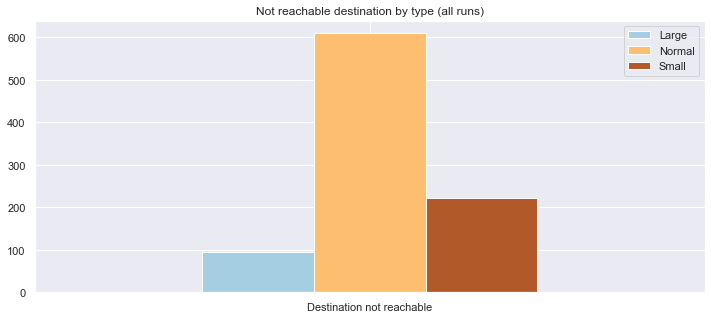

In [24]:
types_df.groupby(level = 1).sum().loc[['Destination not reachable']].plot(kind = "bar", figsize = (12,5), colormap = 'Paired')
plt.title("Not reachable destination by type (all runs)")
plt.xticks(rotation = 0)

In [25]:
success=pd.DataFrame()
changes=pd.DataFrame()
destination=pd.DataFrame()
complete=pd.DataFrame()
stuck=pd.DataFrame()

for i in range(len(types)):
    changes = changes.append(types[i].T.loc[[columns[0]]])
    destination = destination.append(types[i].T.loc[[columns[1]]])
    complete = complete.append(types[i].T.loc[[columns[2]]])
    success = success.append(types[i].T.loc[[columns[3]]])
    stuck = stuck.append(types[i].T.loc[[columns[4]]])

changes['simulation'] = labels_type
destination['simulation'] = labels_type
complete['simulation'] = labels_type
success['simulation'] = labels_type
stuck['simulation'] = labels_type

success.columns = ['Large', 'Normal', 'Small', 'simulation']
changes.columns = ['Large', 'Normal', 'Small', 'simulation']
complete.columns = ['Large', 'Normal', 'Small', 'simulation']
destination.columns = ['Large', 'Normal', 'Small', 'simulation']
stuck.columns = ['Large', 'Normal', 'Small', 'simulation']

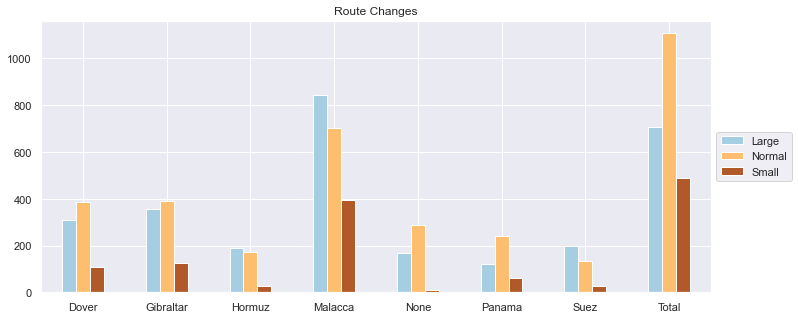

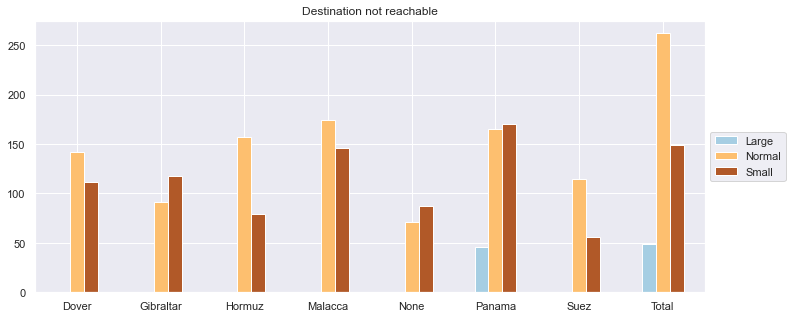

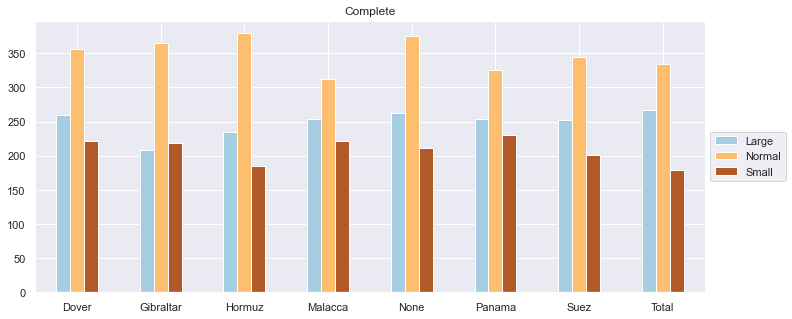

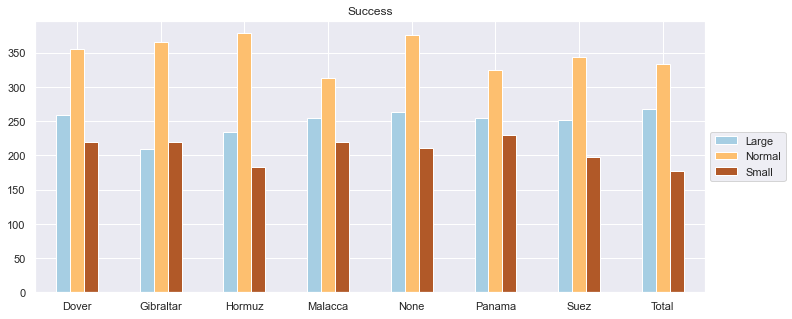

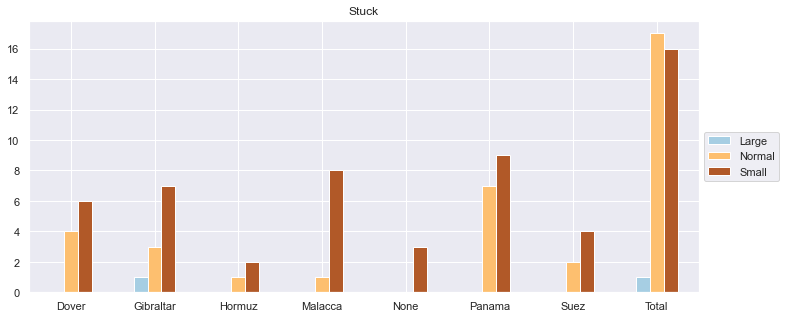

In [26]:
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set_context('notebook')

dfs = [changes, destination, complete, success, stuck]
for i, df in enumerate(dfs):
   ax = df.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = columns[i], figsize = (12, 5), colormap = 'Paired', rot = 0)
   ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
   ax.xaxis.set_label_text("")

Text(0.5, 0, '')

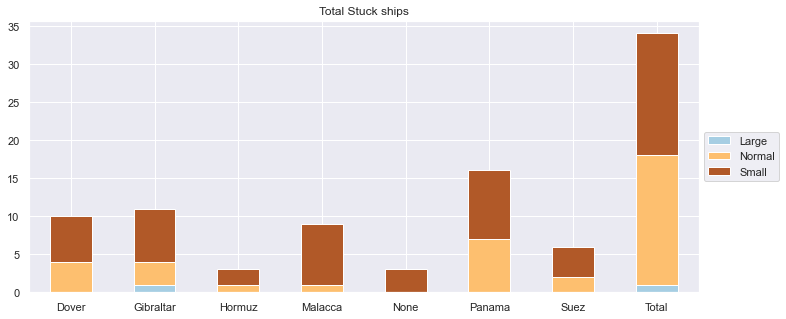

In [27]:
ax = stuck.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total Stuck ships', figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text('')

Text(0.5, 0, '')

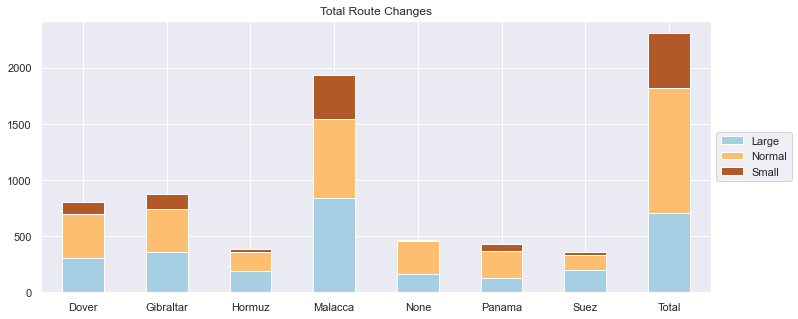

In [28]:
ax = changes.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total Route Changes', figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

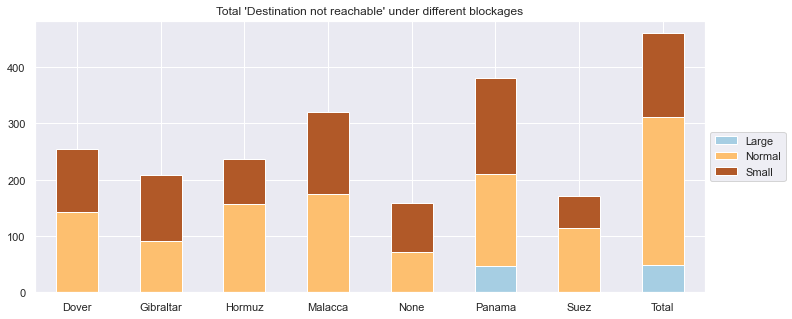

In [29]:
ax = destination.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = "Total 'Destination not reachable' under different blockages", figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

In [30]:
complete['Total Complete'] = complete['Large'] + complete['Normal'] + complete['Small']

Text(0.5, 0, '')

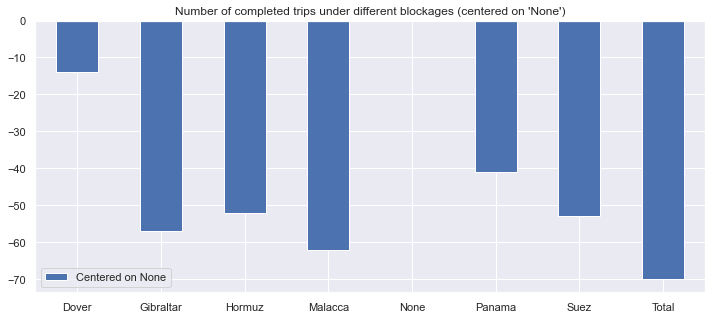

In [31]:
complete['Centered on None'] = complete['Total Complete'] - complete[complete.simulation == 'None']['Total Complete']
ax = complete.plot(x='simulation', y = ['Centered on None'], kind='bar', title = "Number of completed trips under different blockages (centered on 'None')", figsize = (12, 5),  rot=0, sort_columns = True)
ax.xaxis.set_label_text("")

<AxesSubplot:title={'center':'Ratio of successful to complete trips'}>

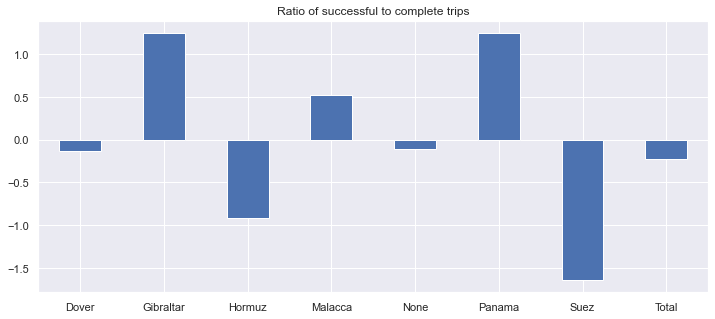

In [32]:
complete_to_succcess = (last_steps.groupby(level = 0)["Success"].sum() / last_steps.groupby(level = 0)["Complete"].sum())
complete_to_succcess_norm = ((complete_to_succcess - complete_to_succcess.mean() ) / complete_to_succcess.std())
complete_to_succcess_norm.plot(kind = "bar", figsize = (12,5), title = 'Ratio of successful to complete trips', rot=0)

## Distance Analysis

In [33]:
distance = pd.DataFrame()
for i in range(len(types)):
    distance = distance.append(types[i].T.loc['Distance_Traveled'])
distance['simulation'] = labels_type
distance.columns = ['Large', 'Normal', 'Small', 'simulation']

In [34]:
distance['total_distance'] = distance['Large']+distance['Normal']+ distance['Small']

Text(0.5, 0, '')

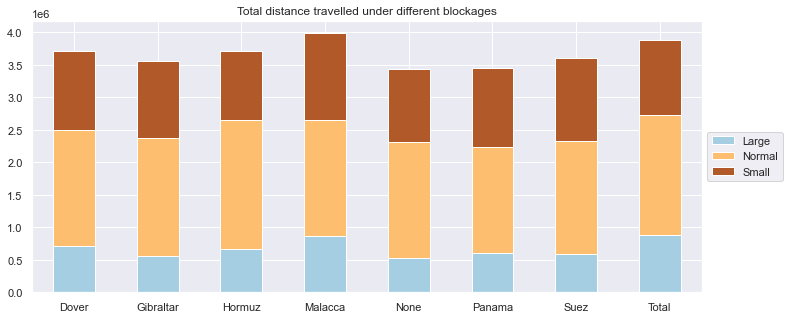

In [35]:
ax = distance.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total distance travelled under different blockages', figsize = (12, 5), colormap = 'Paired', stacked = True, rot = 0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

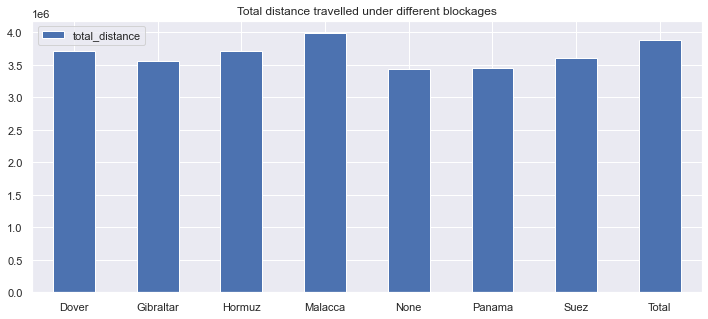

In [36]:
ax = distance.plot(x='simulation', y = 'total_distance', kind='bar', title = 'Total distance travelled under different blockages' , figsize = (12, 5), stacked = True, rot = 0)
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

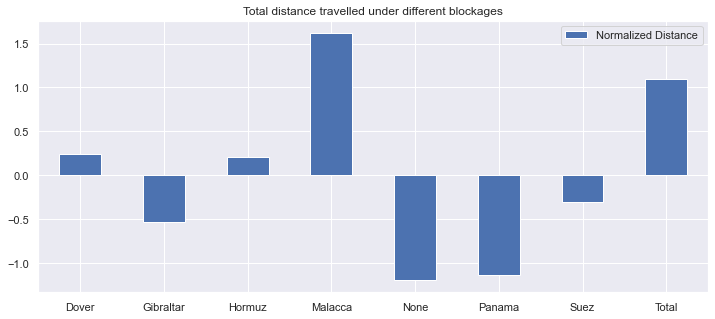

In [37]:
distance['Normalized Distance'] = (distance['total_distance'] - distance['total_distance'].mean()) / distance['total_distance'].std()
ax = distance.plot(x='simulation', y = 'Normalized Distance', kind='bar', title = 'Total distance travelled under different blockages' , figsize = (12, 5), rot = 0)
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

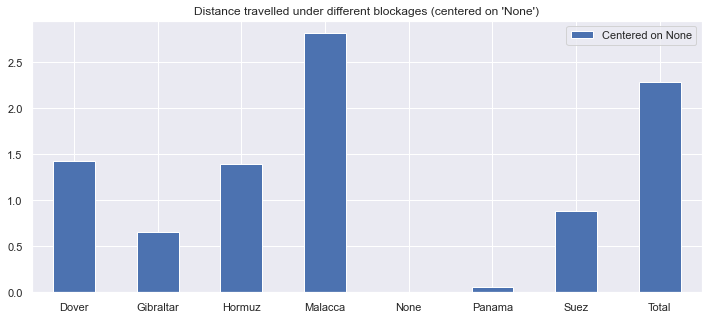

In [38]:


distance['Total Distance'] = distance['Large'] + distance['Normal'] + distance['Small']
distance['Centered on None'] = (distance['Total Distance'] - distance[distance.simulation == 'None']['Total Distance']) / distance['Total Distance'].std()
ax = distance.plot(x='simulation', y = ['Centered on None'], kind='bar', title = "Distance travelled under different blockages (centered on 'None')", figsize = (12, 5),  rot=0)
ax.xaxis.set_label_text("")